INFO:

https://www.youtube.com/watch?v=QpzMWQvxXWk&list=PL7RwtdVQXQ8o6CYe1Teo7FzkrQQoT0c9i
    
https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/notebook

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy

plt.style.use('ggplot')

import nltk



In [5]:
df = pd.read_csv('musk_new.csv')

In [9]:
df.head()


Id                                               Text    Date_New
0   0                Woke v Woke https://t.co/hmhC5eelik  2022-12-08
1   1                         @EthanBitcoin @dergigi lol  2022-12-08
2   2             @EddieZipperer https://t.co/92voOIH5d8  2022-12-08
3   3  RT @teslaownersSV: Tesla Semi is super quiet w...  2022-12-08
4   4  RT @SpaceX: Teams completed additional vehicle...  2022-12-07

In [10]:
df.rename({'Unnamed: 0': 'Id'}, axis=1, inplace=True)
df

Id                                               Text    Date_New
0      0                Woke v Woke https://t.co/hmhC5eelik  2022-12-08
1      1                         @EthanBitcoin @dergigi lol  2022-12-08
2      2             @EddieZipperer https://t.co/92voOIH5d8  2022-12-08
3      3  RT @teslaownersSV: Tesla Semi is super quiet w...  2022-12-08
4      4  RT @SpaceX: Teams completed additional vehicle...  2022-12-07
..   ...                                                ...         ...
908  908                           @BillyM2k Totally agree!  2022-11-09
909  909                RT @robinw: https://t.co/05QY6u4FSD  2022-11-09
910  910                     @TOIPlus Nope, I was alway 🥜 !  2022-11-09
911  911                                    @ZubyMusic Yeah  2022-11-09
912  912    @lawrencekitema @SpaceNews_Inc Congratulations!  2022-11-09

[913 rows x 3 columns]

In [8]:
Basic NLTK


SyntaxError: invalid syntax (871505139.py, line 1)

In [ ]:
example = df['Text'][50]
print(example)

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

In [ ]:
>>> import nltk
>>> nltk.download()

In [ ]:
import nltk

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

In [ ]:
Step 1. VADER Sentiment Scoring

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy!')


In [ ]:
sia.polarity_scores('This is the worst thing ever.')


In [ ]:
sia.polarity_scores(example)


In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

In [ ]:
Plot VADER results


In [ ]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

# TEST 2

In [1]:
pip install twint

Note: you may need to restart the kernel to use updated packages.


In [2]:
import twint
import nest_asyncio
nest_asyncio.apply()

In [3]:
c = twint.Config()
c.Search= 'electric car'

In [4]:
c.Min_likes = 10
c.Count = True
c.Since = "2020-01-01"
c.Store_csv = True # This is for storing file in csv format (if you want in json file it will be c.Store_json=True)
c.Output = 'car1.csv'

In [5]:
twint.run.Search(c)

CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 1.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 8.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 27.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 64.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 125.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 216.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 343.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 512.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 729.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataEx

[+] Finished: Successfully collected 0 Tweets.


Expecting value: line 1 column 1 (char 0) [x] run.Feed[!] if get this error but you know for sure that more tweets exist, please open an issue and we will investigate it!

In [18]:
df = pd.read_csv('EVs.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'EVs.csv'

In [19]:
df.head(11).T

NameError: name 'df' is not defined

In [21]:
pip install textblob

     |████████████████████████████████| 636 kB 2.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install pycountry

     |████████████████████████████████| 10.1 MB 2.6 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=3061eb0cf5341c5badc841aa4dfd08096bda33edfaea7862ec4bc6185db2aebe
  Stored in directory: /Users/saori/Library/Caches/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install langdetect

     |████████████████████████████████| 981 kB 2.6 MB/s eta 0:00:01
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=d8b0de8463b3944f5e07b2ec9df47c117351bb766edb352f4694bebd84917f68
  Stored in directory: /Users/saori/Library/Caches/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install searchtweets


Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [57]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
# Authentication
consumerKey = "Type your consumer key here"
consumerSecret = "Type your consumer secret here"
accessToken = "Type your accedd token here"
accessTokenSecret = "Type your access token secret here"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)


In [37]:
api_key = 'vcCmOETCASdUd0CpAdCtAT1H7'

api_secret = '8KEdeRxbIiQdRzC5oQFpJreC6b87I3LN2Sq6cwLXlkBB1aEGTw'

bearer_token = 'AAAAAAAAAAAAAAAAAAAAAKnFRAEAAAAA0WTW5LZ0FZm0YaTCHQpjYW2BzmI%3DAis5txxF8CKfT5UfsbcG9UznM61bmjCuN6FqlZwqJIjycjw9Hl'

access_token = '1410231389220376584-B2PrnZFEXKU6coWb3AEWGPODV4YJ9F'

access_token_secret = 'PPwZ8sh80xzCPochgHytGCzk3USP2RQkmUeRPqq2LqiHR'

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [40]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')


Please enter keyword or hashtag to search: electric car
Please enter how many tweets to analyze: 2000


In [41]:

#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2000
positive number:  677
negative number:  603
neutral number:  720


In [42]:
tweet_list


0
0     RT @WayneDupreeShow: Sorry it’s -40 degrees ou...
1     RT @Blazespage: So, most of you know we're 100...
2     RT @NIOAdmirer: Germany's EnBW, which invests ...
3     RT @WayneDupreeShow: Sorry it’s -40 degrees ou...
4     @uneed2calmdown @elonmusk @SenatorSinema oh yo...
...                                                 ...
1995  RT @RANDCorporation: China could one day use c...
1996                    I need the electric dominos car
1997  RT @RobotAndAIWorld: Introducing 19_19, Citroë...
1998  China could one day use cobalt—a key material ...
1999  RT @segundoatdell: An amazing fully-electric a...

[2000 rows x 1 columns]

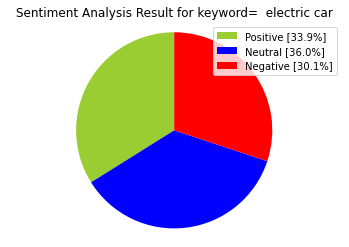

In [43]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()



In [44]:
tweet_list.drop_duplicates(inplace = True)


In [47]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

0  \
0     RT @WayneDupreeShow: Sorry it’s -40 degrees ou...   
1     RT @Blazespage: So, most of you know we're 100...   
2     RT @NIOAdmirer: Germany's EnBW, which invests ...   
4     @uneed2calmdown @elonmusk @SenatorSinema oh yo...   
5     1st Commercially Available Electric, Autonomou...   
...                                                 ...   
1993  RT @mashable: This electric flying car could b...   
1996                    I need the electric dominos car   
1997  RT @RobotAndAIWorld: Introducing 19_19, Citroë...   
1998  China could one day use cobalt—a key material ...   
1999  RT @segundoatdell: An amazing fully-electric a...   

                                                   text  
0     RT @WayneDupreeShow: Sorry it’s -40 degrees ou...  
1     RT @Blazespage: So, most of you know we're 100...  
2     RT @NIOAdmirer: Germany's EnBW, which invests ...  
4     @uneed2calmdown @elonmusk @SenatorSinema oh yo...  
5     1st Commercially Available Electric, Autonomou...  
...                                                 ...  
1993  RT @mashable: This electric flying car could b...  
1996                    I need the electric dominos car  
1997  RT @RobotAndAIWorld: Introducing 19_19, Citroë...  
1998  China could one day use cobalt—a key material ...  
1999  RT @segundoatdell: An amazing fully-electric a...  

[1201 rows x 2 columns]

In [48]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)


0  \
0   RT @WayneDupreeShow: Sorry it’s -40 degrees ou...   
1   RT @Blazespage: So, most of you know we're 100...   
2   RT @NIOAdmirer: Germany's EnBW, which invests ...   
4   @uneed2calmdown @elonmusk @SenatorSinema oh yo...   
5   1st Commercially Available Electric, Autonomou...   
6   The cold already takes half the battery life. ...   
7   @elonmusk @Cernovich @annecollier @eirliani @p...   
8   RT @kos_data: Thursday in Balkans:\n\n🇽🇰 incre...   
9   RT @TheFestiveOwl: GIVEAWAY — @Electric_Forest...   
12  RT @Uh_ohhhhhhh: #原神 ＃空荧 ＃aelumi \n"It's ugly ...   

                                                 text  
0    sorry it s  40 degrees outside  but you can t...  
1    so  most of you know we re 100  off grid here...  
2    germany s enbw  which invests more than 100 m...  
4         oh you hate the electric car man now tha...  
5   1st commercially available electric  autonomou...  
6   the cold already takes half the battery life  ...  
7             lesley is tesla gonna design an elec...  
8    thursday in balkans      increase police forc...  
9    giveaway     forest reveals 2023 lineup      ...  
12            aelumi   it s ugly for a man to sit ...

In [49]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)


0  \
0   RT @WayneDupreeShow: Sorry it’s -40 degrees ou...   
1   RT @Blazespage: So, most of you know we're 100...   
2   RT @NIOAdmirer: Germany's EnBW, which invests ...   
4   @uneed2calmdown @elonmusk @SenatorSinema oh yo...   
5   1st Commercially Available Electric, Autonomou...   
6   The cold already takes half the battery life. ...   
7   @elonmusk @Cernovich @annecollier @eirliani @p...   
8   RT @kos_data: Thursday in Balkans:\n\n🇽🇰 incre...   
9   RT @TheFestiveOwl: GIVEAWAY — @Electric_Forest...   
12  RT @Uh_ohhhhhhh: #原神 ＃空荧 ＃aelumi \n"It's ugly ...   

                                                 text  polarity  subjectivity  \
0    sorry it s  40 degrees outside  but you can t... -0.250000      0.525000   
1    so  most of you know we re 100  off grid here...  0.500000      0.500000   
2    germany s enbw  which invests more than 100 m...  0.500000      0.500000   
4         oh you hate the electric car man now tha... -0.800000      0.900000   
5   1st commercially available electric  autonomou...  0.338095      0.580952   
6   the cold already takes half the battery life  ... -0.307407      0.485185   
7             lesley is tesla gonna design an elec...  0.000000      0.000000   
8    thursday in balkans      increase police forc... -0.100000      0.100000   
9    giveaway     forest reveals 2023 lineup      ...  0.500000      0.500000   
12            aelumi   it s ugly for a man to sit ... -0.350000      0.500000   

   sentiment    neg    neu    pos  compound  
0   negative  0.071  0.929  0.000   -0.0387  
1   positive  0.000  0.902  0.098    0.3612  
2    neutral  0.000  1.000  0.000    0.0000  
4   negative  0.285  0.715  0.000   -0.5823  
5   positive  0.000  0.828  0.172    0.4019  
6   positive  0.000  0.909  0.091    0.2732  
7    neutral  0.000  1.000  0.000    0.0000  
8   positive  0.000  0.881  0.119    0.3182  
9   positive  0.000  0.846  0.154    0.2500  
12  negative  0.202  0.798  0.000   -0.5106

In [51]:

#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [52]:

#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])


In [53]:

#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

Total  Percentage
positive    488       40.63
neutral     487       40.55
negative    226       18.82

In [66]:


# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pc.index
size= pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


NameError: name 'pc' is not defined

In [61]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open(""))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [63]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

AttributeError: 'str' object has no attribute 'read'